# Linear Regression 

useful to predict when continuous spectrum of output is needed

Regression: A process by which we estimate the value of dependent variable on the basis of one or more independent variables is called.


common error measures: 
sensitivity,specificity , median absolute deviation

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as classification function.

The method of least squares calculates square of deviations of the points from the line chosen using Linear Regression. Our target is that this error should be minimum

In [1]:
import numpy as np
import pandas as pd

In [46]:
data=np.loadtxt('data.csv',delimiter=",")
#numpy loadtxt(): by default delimeter is space, loads data from text file

In [7]:
data.shape

(100, 2)

In [8]:
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [27]:
x=data[:,0].reshape(-1, 1) #else error as most of the cases there are more than 1 features so expects a 2d array
y=data[:,1]
#X has all the rows of 0th Col and Y has all the rows of 1st Col

In [24]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)

In [25]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()

In [42]:
alg1.fit(x_train,y_train)
#linear regression would have used this data to fit this line

LinearRegression()

In [29]:
alg1.coef_ #m

array([1.29070936])

In [30]:
alg1.intercept_

9.533793124519548

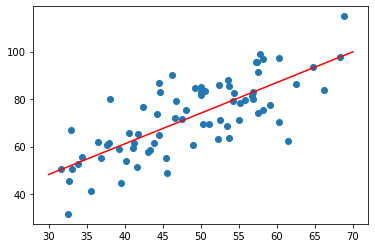

In [39]:
import matplotlib.pyplot as plt
m=alg1.coef_[0]
c=alg1.intercept_
x_l=np.arange(30,70.1)
y_l=m * x_l +c

plt.plot(x_l,y_l,"r")
x_train.reshape(75)
plt.scatter(x_train,y_train)
plt.show()

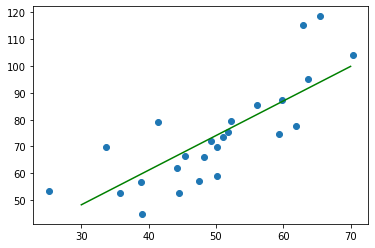

In [45]:
import matplotlib.pyplot as plt
m=alg1.coef_[0]
c=alg1.intercept_
x_l=np.arange(30,70.1)
y_l=m * x_l +c

plt.plot(x_l,y_l,"g")
x_test.reshape(25)
plt.scatter(x_test,y_test)
plt.show()

for some test points big errors for somenot.
line: prediction that will come

### Coefficient of determination

In [47]:
score_test=alg1.score(x_test,y_test)

0.6401564671184397

In [50]:
score_train=alg1.score(x_train,y_train)
score_train
#it has learn using training data n if we give the same data back for testing

0.5777042994992911

In [1]:
import numpy as np
X = np.array([1,2,3,4])
X.shape

(4,)

In [ ]:
What is the best objective way to define the best fit line ?
- By minimizing the error function

For simple linear equation y=mx+b we can calculate Mean Square Error as:
    MSE= 1/N SUM i=1 to n[y{i} - (mx{i} + b ) ^2]
    N: total no of observation
    1/N SUM() :Mean
    y{i} : actual value of observation
    mx{i} + b : prediction 

# Code

In [28]:
import numpy as np

In [29]:
data=np.loadtxt('data.csv',delimiter=",")

In [30]:
x=data[:,0]
y=data[:,1]

In [31]:
x.shape

(100,)

In [36]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3)
X_train.shape
#if you want test size to be other than 25%

(70,)

In [8]:
x_train.shape

(70,)

In [37]:
def fit(x_train, y_train):
    num = (x_train*y_train).mean() - x_train.mean() * y_train.mean()
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    c = y_train.mean() - m * x_train.mean()
    return m, c
    

In [38]:
def predict(x, m, c):
    return m * x + c

def score(y_truth, y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1 - u/v

def cost (x, y, m , c):
    return ((y - m * x - c)**2).mean()

In [41]:
m, c = fit(X_train, Y_train)
# test data
y_test_pred = predict(X_test, m, c)
print("Test Score: ",score(Y_test, y_test_pred))

#train data
y_train_pred = predict(X_train, m, c)
print("Train Score: ", score(Y_train, y_train_pred))
print("M, C ", m , c)
print("Cost on training data ", cost(X_train,Y_train, m, c ))

Test Score:  0.47990095810428346
Train Score:  0.6441875275217821
M, C  1.3485222348854278 6.809315320254768
Cost on training data  98.22313359583349
